In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
import time, datetime
import re

In [2]:
data=pd.read_csv('./New_Clean.csv')

In [15]:
print(data.shape)

(300261, 14)


C:\Users\haris\AppData\Local\Temp\ipykernel_11032\2285013619.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)


Text(0.5, 1.0, 'Features correlation')

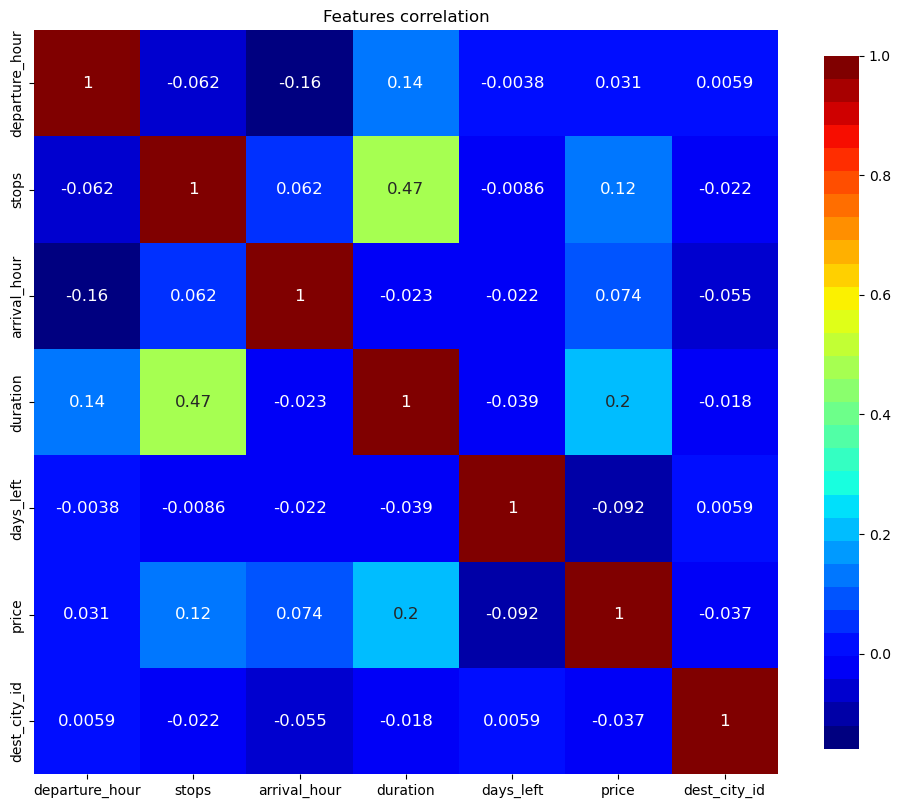

In [14]:
df = data.select_dtypes(include=['number'])
corr = df.corr(method='pearson')
cmap = cm.get_cmap('jet', 30)
_, ax = plt.subplots( figsize = ( 12 , 10 ) )
sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax,
annot = True, annot_kws = { 'fontsize' : 12 }, xticklabels=corr.columns,
yticklabels=corr.columns)
plt.title("Features correlation")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300261 non-null  object 
 1   flight            300261 non-null  object 
 2   source_city       300261 non-null  object 
 3   departure_time    300261 non-null  object 
 4   stops             300261 non-null  int64  
 5   arrival_time      300261 non-null  object 
 6   destination_city  300261 non-null  object 
 7   class             300261 non-null  object 
 8   duration          300261 non-null  float64
 9   days_left         300261 non-null  int64  
 10  price             300261 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 25.2+ MB


In [5]:
data.describe()

,stops,duration,days_left,price
count,300261.000000,300261.000000,300261.000000,300261.000000
mean,0.924213,12.219142,26.004473,20883.717666
std,0.398188,7.200348,13.560985,22695.911266
min,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,6.750000,15.000000,4783.000000
50%,1.000000,11.250000,26.000000,7425.000000
75%,1.000000,16.170000,38.000000,42521.000000
max,2.000000,103.000000,49.000000,123071.000000


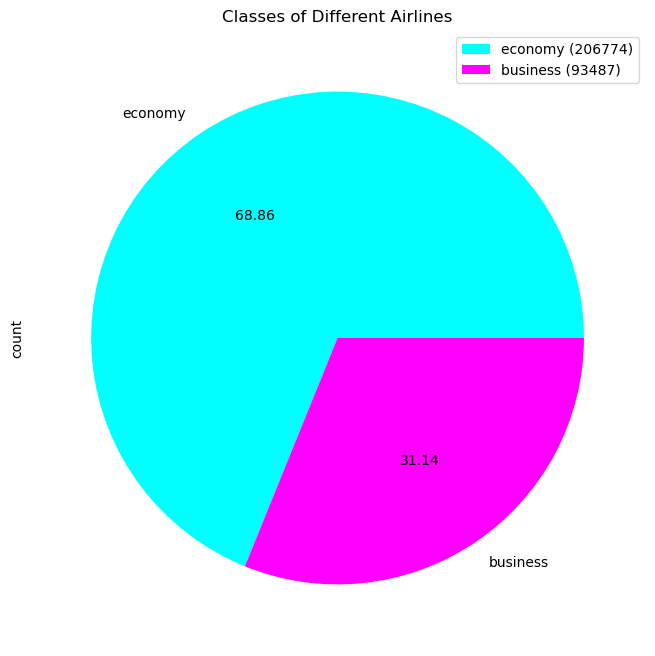

In [6]:
class_counts = data['class'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
pie = data['class'].value_counts().plot(kind='pie', autopct='%.2f', cmap='cool')
plt.title('Classes of Different Airlines')

# Get legend labels with counts
legend_labels = [f"{label} ({count})" for label, count in zip(class_counts.index, class_counts)]

plt.legend(legend_labels)
plt.show()

In [7]:
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [8]:
print(data['airline'].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India' 'Trujet'
 'StarAir']


In [9]:
airline_counts = data['airline'].value_counts()

print(airline_counts)

airline
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64


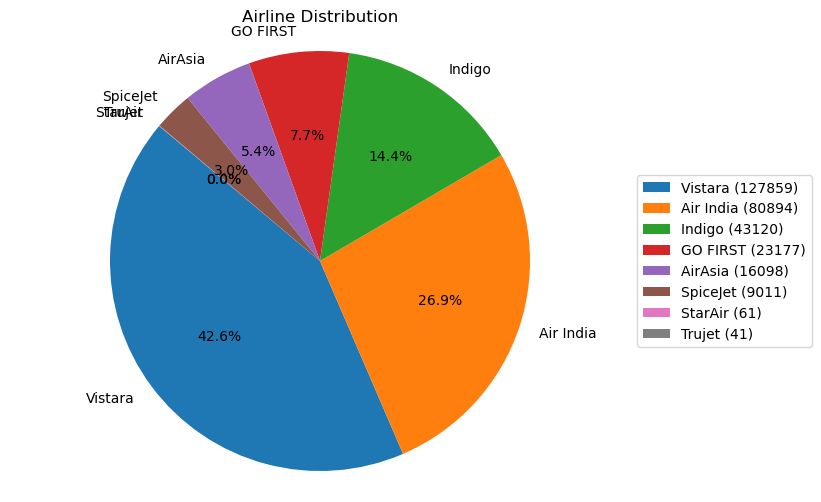

In [10]:
airline_counts = data['airline'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(airline_counts, labels=airline_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Airline Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add legend with counts
legend_labels = [f"{label} ({count})" for label, count in zip(airline_counts.index, airline_counts)]
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [11]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early Morning,0,Morning,Mumbai,economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early Morning,0,Early Morning,Mumbai,economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300256,Vistara,UK -822,Chennai,Morning,1,Evening,Hyderabad,business,10.08,49,69265
300257,Vistara,UK -826,Chennai,Afternoon,1,Night,Hyderabad,business,10.42,49,77105
300258,Vistara,UK -832,Chennai,Early Morning,1,Night,Hyderabad,business,13.83,49,79099
300259,Vistara,UK -828,Chennai,Early Morning,1,Evening,Hyderabad,business,10.00,49,81585


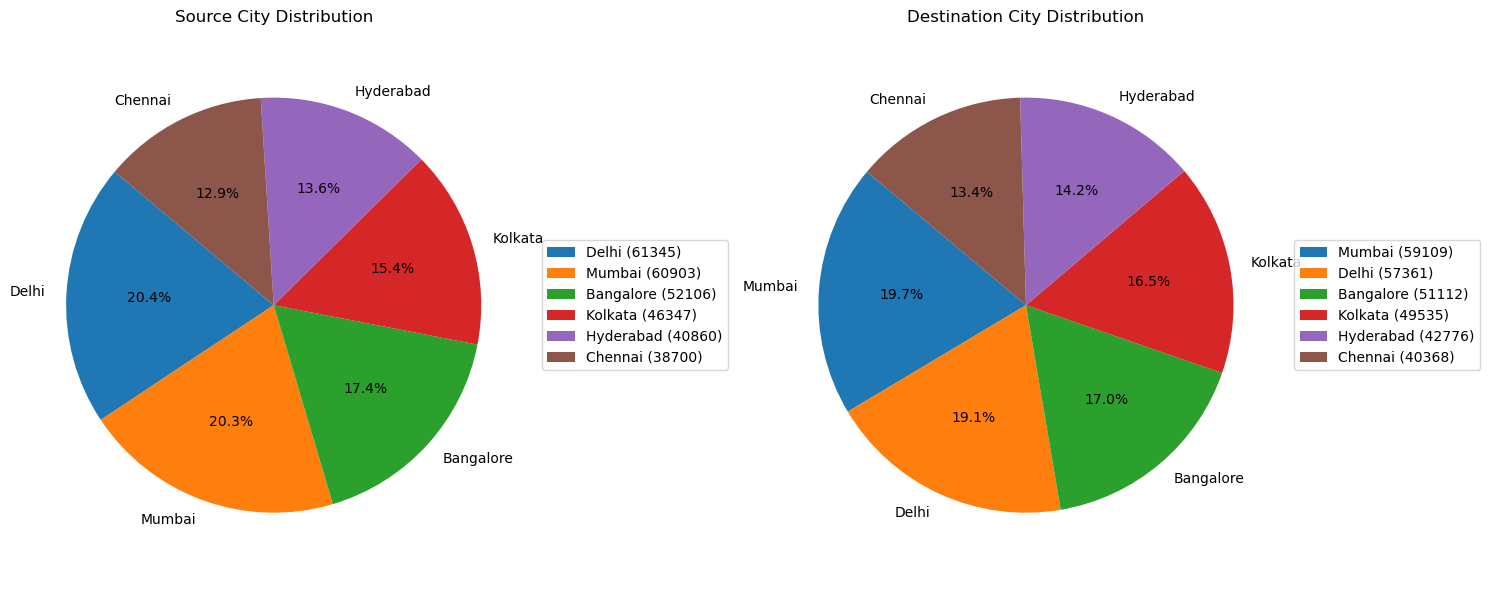

In [12]:
# Count occurrences of source cities
source_city_counts = data['source_city'].value_counts()

# Count occurrences of destination cities
destination_city_counts = data['destination_city'].value_counts()

# Plotting source city distribution
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.pie(source_city_counts, labels=source_city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Source City Distribution')
plt.axis('equal')

# Add legend for source cities with counts
legend_labels_source = [f"{label} ({count})" for label, count in zip(source_city_counts.index, source_city_counts)]
plt.legend(legend_labels_source, loc="center left", bbox_to_anchor=(1, 0.5))

# Plotting destination city distribution
plt.subplot(1, 2, 2)
plt.pie(destination_city_counts, labels=destination_city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Destination City Distribution')
plt.axis('equal')

# Add legend for destination cities with counts
legend_labels_destination = [f"{label} ({count})" for label, count in zip(destination_city_counts.index, destination_city_counts)]
plt.legend(legend_labels_destination, loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

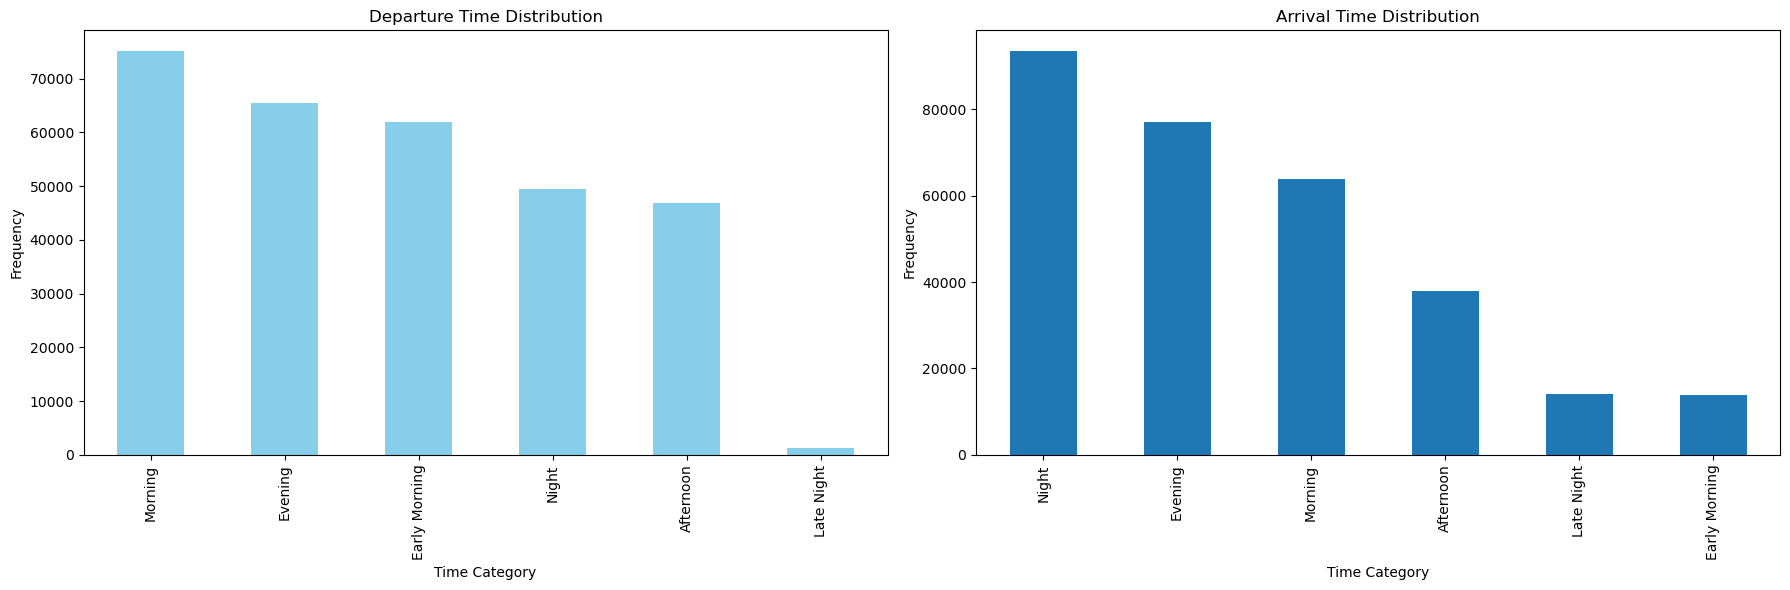

In [13]:
departure_time_counts = data['departure_time'].value_counts()

# Count occurrences of each arrival time category
arrival_time_counts = data['arrival_time'].value_counts()

# Plotting
plt.figure(figsize=(18, 6))

# Bar chart for departure time categories
plt.subplot(1, 2, 1)
departure_time_counts.plot(kind='bar', color='skyblue')
plt.title('Departure Time Distribution')
plt.xlabel('Time Category')
plt.ylabel('Frequency')

# Bar chart for arrival time categories
plt.subplot(1, 2, 2)
arrival_time_counts.plot(kind='bar' )
plt.title('Arrival Time Distribution')
plt.xlabel('Time Category')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

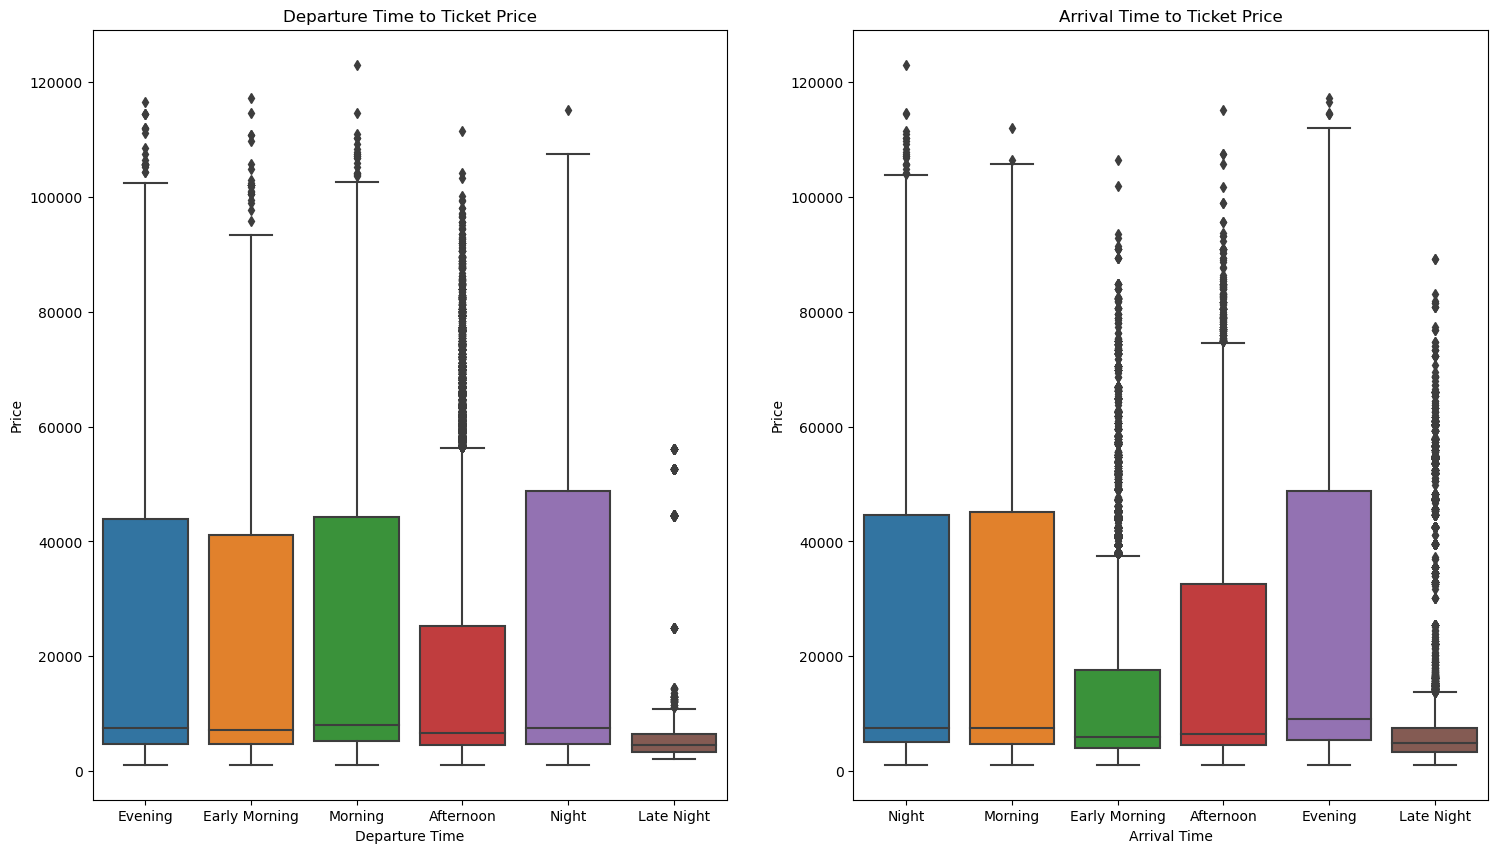

In [14]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=data)
plt.title('Departure Time to Ticket Price')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=data)
plt.title('Arrival Time to Ticket Price')
plt.xlabel('Arrival Time')
plt.ylabel('Price')
plt.show()

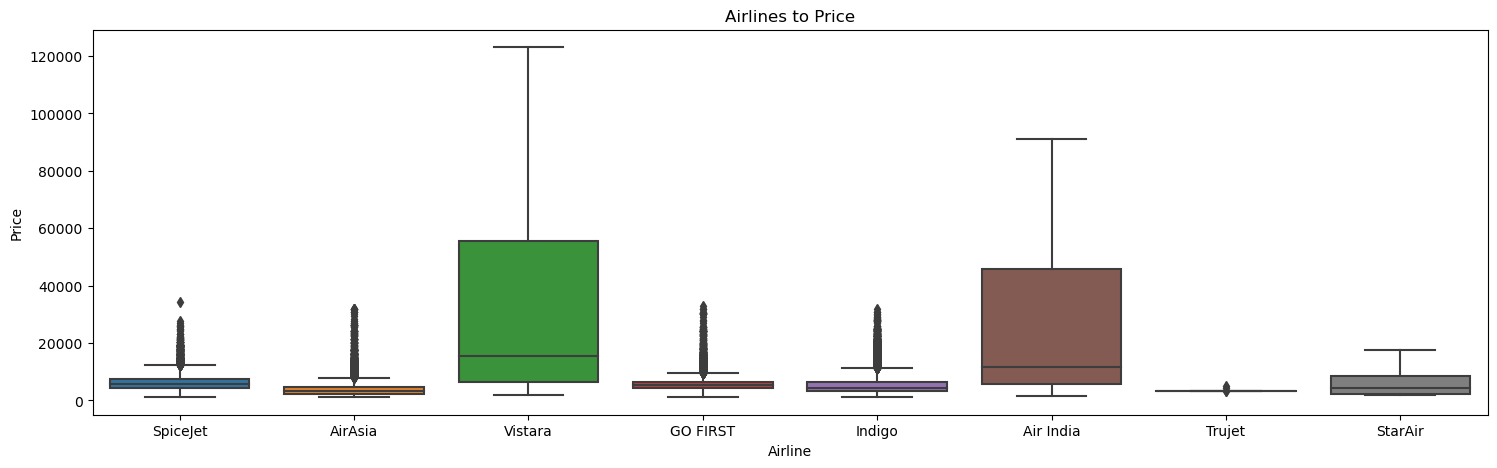

In [15]:
plt.figure(figsize=(18,5))
sns.boxplot(x=data['airline'],y=data['price'])
plt.title('Airlines to Price')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

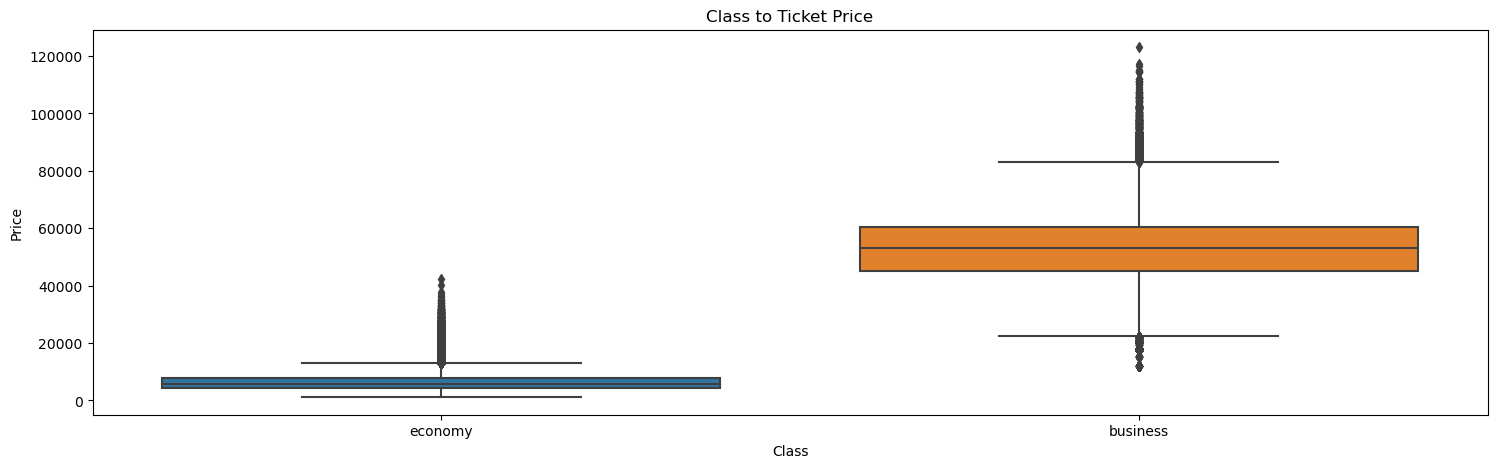

In [16]:
plt.figure(figsize=(18,5))
sns.boxplot(x='class',y='price',data=data)
plt.title('Class to Ticket Price')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

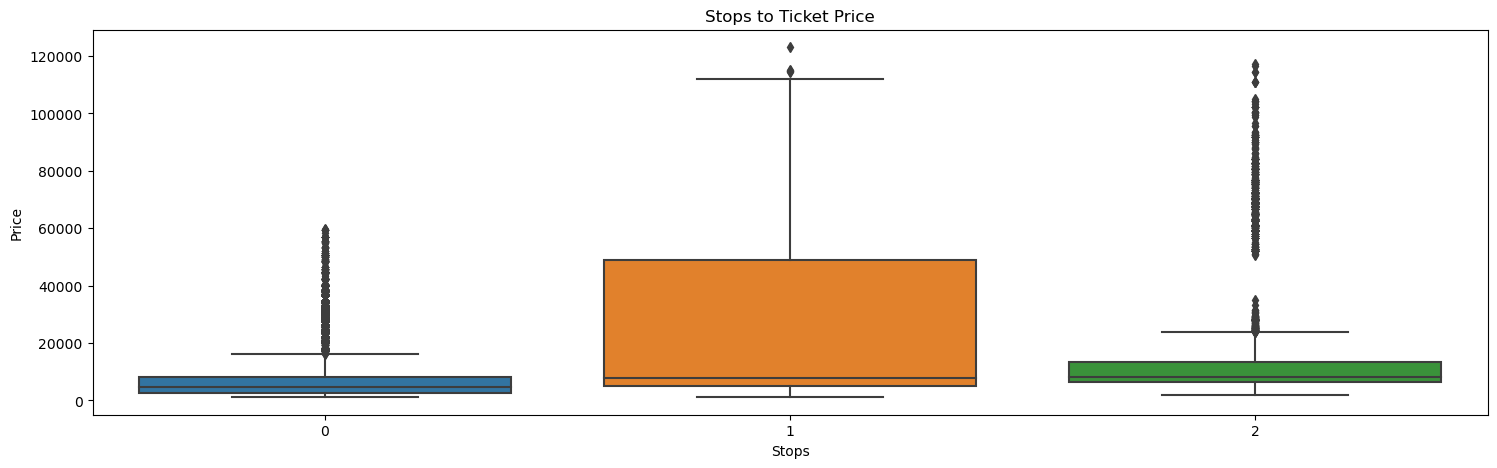

In [17]:
plt.figure(figsize=(18,5))
sns.boxplot(x='stops',y='price',data=data)
plt.title('Stops to Ticket Price')
plt.xlabel('Stops')
plt.ylabel('Price')
plt.show()